In [28]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.abspath(".."))
sys.path.append(os.path.abspath("../utils"))

from utils.get_images import get_images

In [7]:
mnist_path = '../mnist/'
x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_path)

x_train = x_train_num[:50000].reshape(50000, -1).astype(np.float32)
y_train = y_train_num[:50000].reshape(50000, 1)

x_val = x_train_num[50000:].reshape(10000, -1).astype(float)
y_val = y_train_num[50000:].reshape(10000, 1)

x_test = x_test_num.copy().reshape(10000, -1).astype(float)
y_test = y_test_num.copy().reshape(10000, 1)

In [13]:
def normalise(x_mean, x_std, x_data):
    return (x_data-x_mean)/x_std

In [15]:
x_t = normalise(x_train[:128].mean(),x_train[:128].std(), x_train[:128])
print(x_t.min())
print(x_t.max())
print(x_t.mean())
print(x_t.std())

-0.4187288
2.8666344
-2.0223004e-08
1.0


Inicialización de pesos sinápticos con Valores aleatorios, Xavier, y Kaiming He

In [16]:
# inicialización normal
def init_params(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1], neurons[i]) * 0.001
    
    return weights

In [20]:
# inicialización Xavier, los pesos sinapticos se dividen entre la raiz cuadrada de la cantidad de elementos de entrada de la capa
def init_xavier(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1], neurons[i]) / np.sqrt(neurons[i])
    
    return weights

In [21]:
# inicialización Kaiming He, se llega al cálculo de dividir entre la raíz cuadrada del número de elementos de la entrada dividido entre dos
def init_kaiming(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1], neurons[i]) / np.sqrt(neurons[i]/2)
    
    return weights

In [22]:
# ejemplo, asumimos que tenemos 500 neuronas en cada capa, 10 capas
neurons = [500] * 10
neurons[0] = 784
neurons[-1] = 10

print(neurons)

[784, 500, 500, 500, 500, 500, 500, 500, 500, 10]


In [23]:
weights = init_params(neurons)

weights_x = init_xavier(neurons)

weights_k = init_kaiming(neurons)

In [24]:
# prueba de por qué inicializar la red con valores pequeños aleatoreos, para una red de muchas neuronas, no tiene es util

acts = {}

z = x_t.T
for (k, v) in weights.items():
    z = v @ z
    acts[k] = z

In [26]:
print(acts.keys())

dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])


La activación para la capa L1 tiene una media de 0.0005577 y una std de 0.02789
La activación para la capa L2 tiene una media de 1.497e-06 y una std de 0.0006201
La activación para la capa L3 tiene una media de 7.79e-08 y una std de 1.411e-05
La activación para la capa L4 tiene una media de -5.127e-09 y una std de 3.077e-07
La activación para la capa L5 tiene una media de 1.129e-10 y una std de 6.981e-09
La activación para la capa L6 tiene una media de 1.181e-12 y una std de 1.569e-10
La activación para la capa L7 tiene una media de 4.35e-14 y una std de 3.473e-12
La activación para la capa L8 tiene una media de -8.669e-17 y una std de 7.668e-14
La activación para la capa L9 tiene una media de -1.037e-16 y una std de 1.452e-15


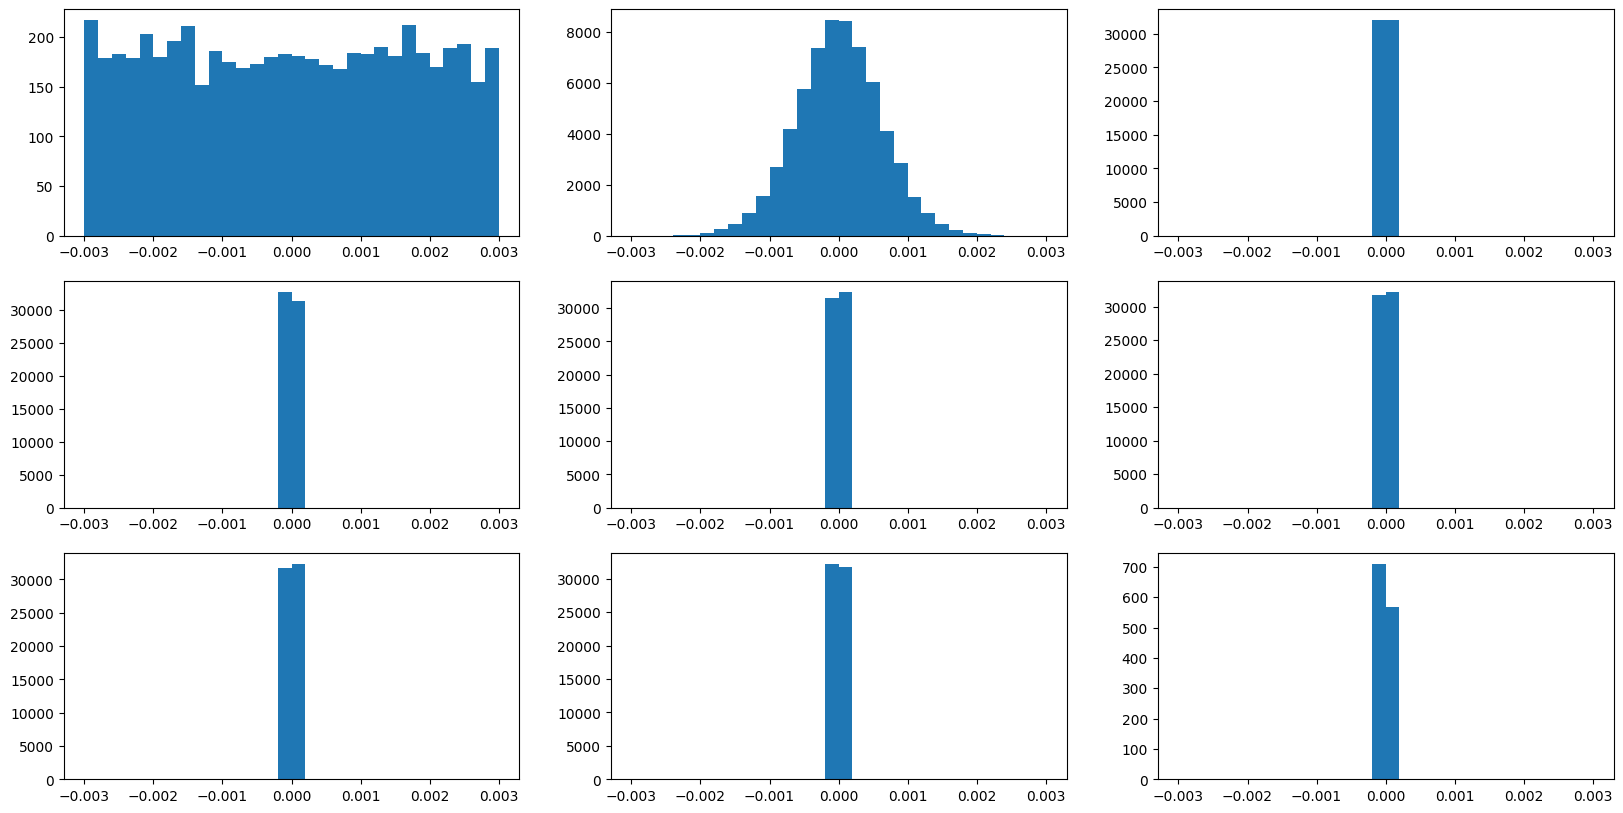

In [29]:
# prueba lineal de la inicialización de los pesos por valor pequeño arbitrario

plt.figure(figsize=(20,10))

for i, (k, v) in enumerate(acts.items()):
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')

for i, (k, v) in enumerate(acts.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-.003, .003])

plt.show()

Entonces, con una función de inicialización de parámetros que posee el parámetro usual pequeño, la desviación estandar cada vez es más pequeña. Lo que significa que las activaciones de las capas cada vez son más pequeños.

- La actividad en la primera y segunda capaz se persiven, pero a partir de la tercera son cercanos a cero, implicando que la actualización de los parámetros no va a existir una actualización de los parámetros en las últimas capas y la red no va a aprender.
- El problema tiene el nombre de Vanishing gradient.

In [38]:
# forma de inicializar los pesos con Xavier

acts_x = {}
z = x_t.T
for (k, v) in weights_x.items():
    z = v @ z
    #z = np.maximum(0, z) # ejemplo replicando el paper con ReLU
    #z = 1/(1+np.exp(-z)) # ejemplo replicando el paper donde ReLu no es usado y no era famosa
    z = np.tanh(z) # ejemplo replicando el paper con tanh
    acts_x[k] = z

La activación para la capa L1 tiene una media de 0.001598 y una std de 0.6159
La activación para la capa L2 tiene una media de -0.01133 y una std de 0.4803
La activación para la capa L3 tiene una media de -0.000601 y una std de 0.4069
La activación para la capa L4 tiene una media de 0.002065 y una std de 0.3576
La activación para la capa L5 tiene una media de -0.007954 y una std de 0.3191
La activación para la capa L6 tiene una media de -0.001121 y una std de 0.291
La activación para la capa L7 tiene una media de 0.003521 y una std de 0.2703
La activación para la capa L8 tiene una media de -0.01017 y una std de 0.2548
La activación para la capa L9 tiene una media de 0.01634 y una std de 0.2483


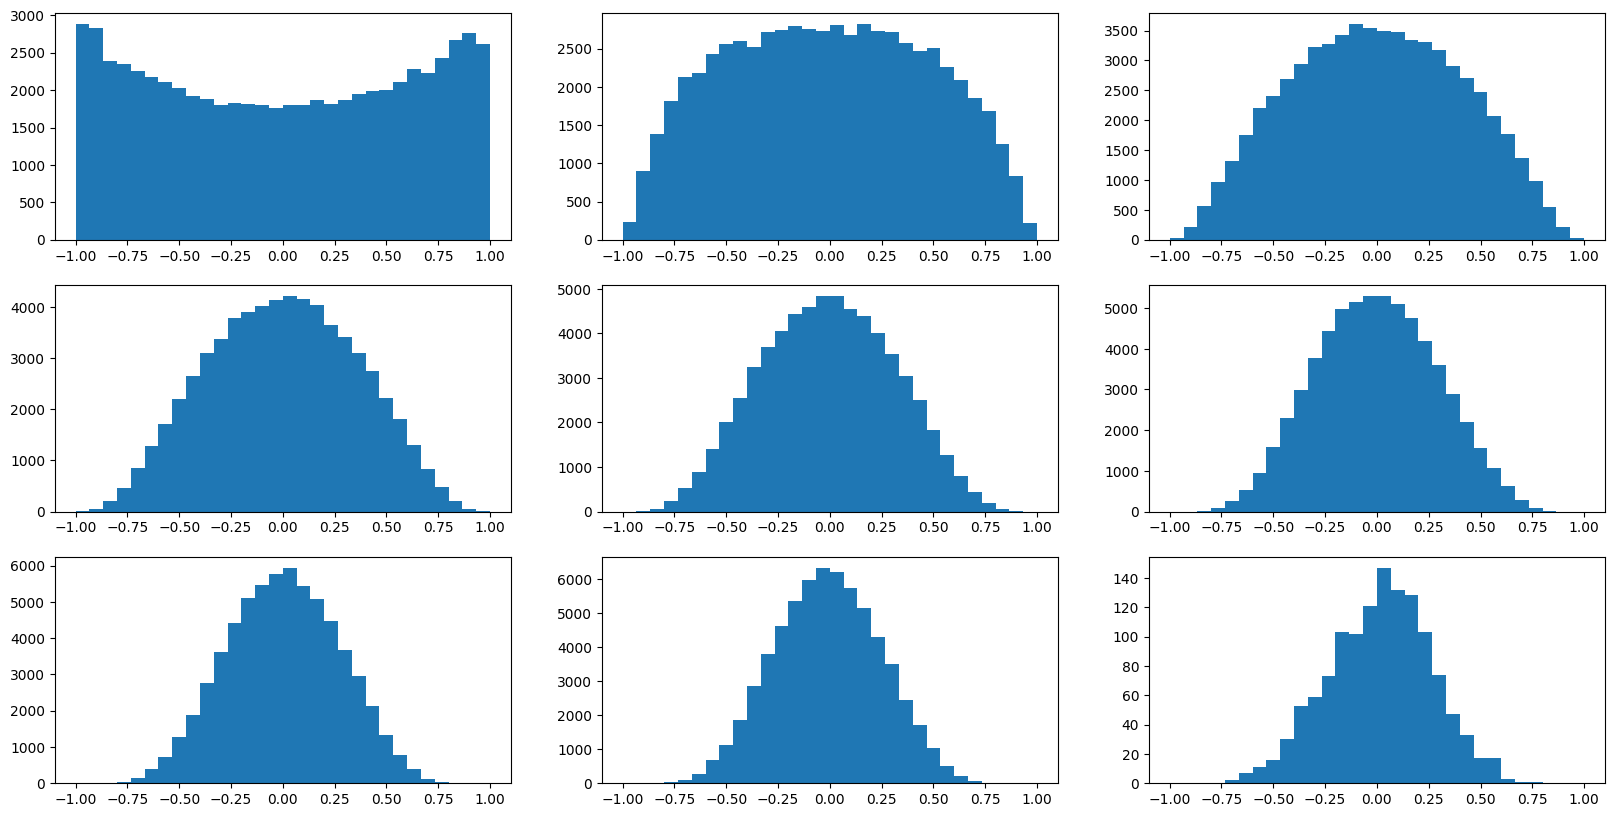

In [39]:
plt.figure(figsize=(20,10))

for i, (k, v) in enumerate(acts_x.items()):
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')
    

for i, (k, v) in enumerate(acts_x.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-1, 1])

plt.show()

En este caso, en capas superiores si existe actividad con la elección de parámetro de activación.

In [40]:
# forma de inicializar los pesos con Kaiming He

acts_k = {}
z = x_t.T
for (k, v) in weights_k.items():
    z = v @ z
    z = np.maximum(0, z) # ejemplo replicando el paper con ReLU
    acts_k[k] = z

La activación para la capa L1 tiene una media de 0.5604 y una std de 0.8307
La activación para la capa L2 tiene una media de 0.5489 y una std de 0.8285
La activación para la capa L3 tiene una media de 0.5138 y una std de 0.785
La activación para la capa L4 tiene una media de 0.5344 y una std de 0.7809
La activación para la capa L5 tiene una media de 0.5471 y una std de 0.8008
La activación para la capa L6 tiene una media de 0.5492 y una std de 0.8239
La activación para la capa L7 tiene una media de 0.5804 y una std de 0.8709
La activación para la capa L8 tiene una media de 0.533 y una std de 0.8471
La activación para la capa L9 tiene una media de 0.518 y una std de 0.7132


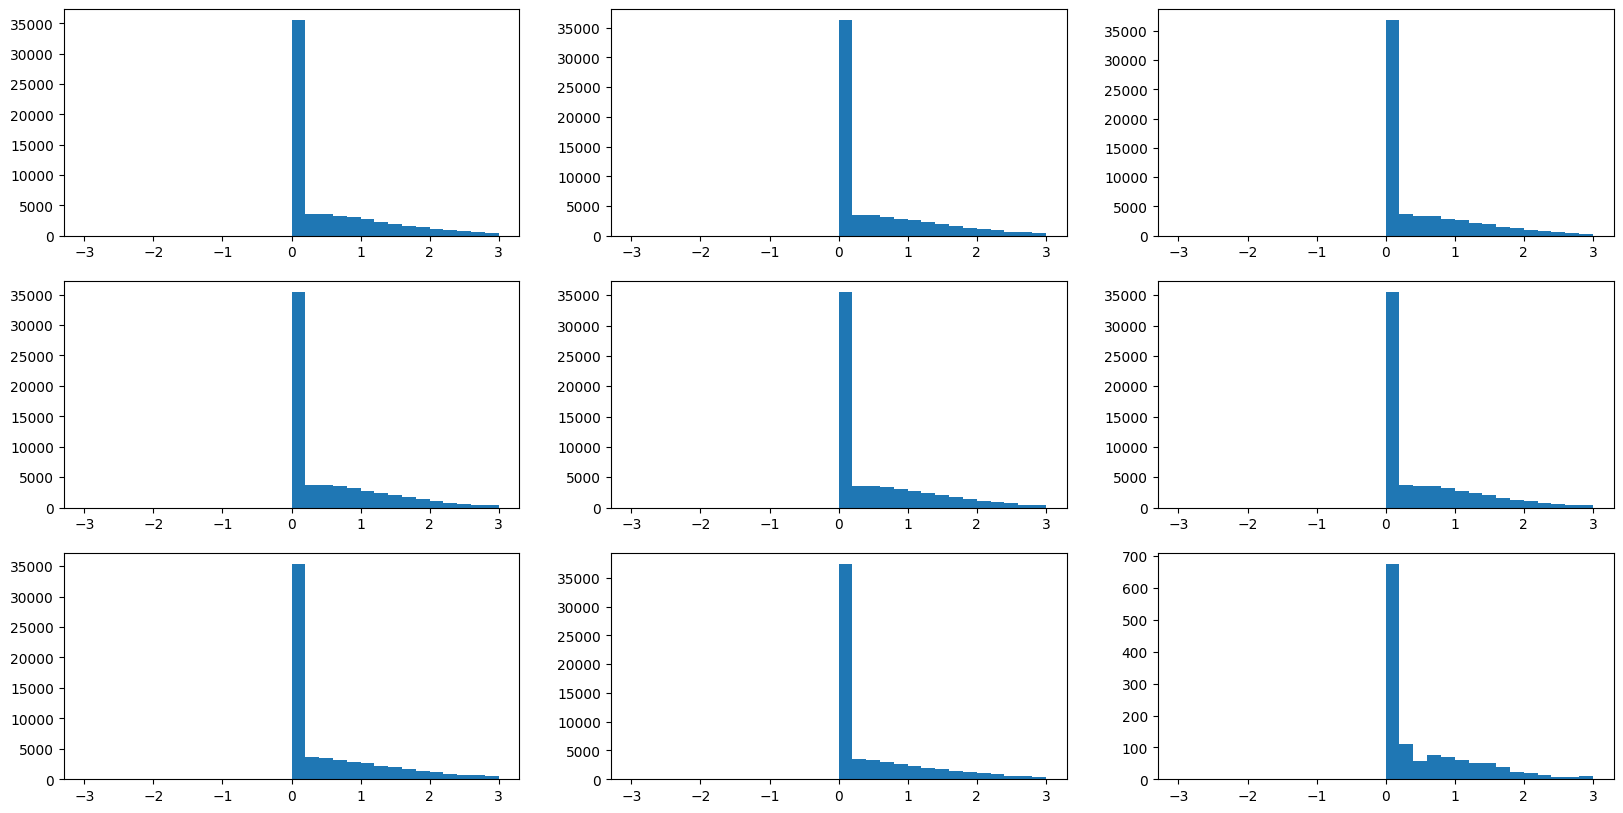

In [41]:
plt.figure(figsize=(20,10))

for i, (k, v) in enumerate(acts_k.items()):
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')
    

for i, (k, v) in enumerate(acts_k.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-3, 3])

plt.show()

En este caso, el hecho que la desviación estandar sea cercana a 1 y varie, nos muestra que se activan las diferentes capas y además hay variabilidad.
Este estandar de Kaiming y He es el estandar utilizado.